# Investigation of Ford Go-Bike Trips
## by Ibrahim Sherif

## Investigation Overview

> During this investigation, we will focus on the duration of the trips and the factors that may affect that duration. We may think that the main features are the distance covered for each trip, members' gender, the members' types and the starting day of the trips.

## Dataset Overview

> The dataset consists of 183,412 bikes trips with 15 features. We have added new column for the distance in KM and a new column for the starting day for each trip. Also a new column for age is added assuming that we are now on 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Ford_go_trip.csv')

## Distribution of the Trip Durations

> Trip durations in the dataset take on a very large range of values, from about nearly 50 seconds at the lowest, to about 80,000 seconds at the highest. Plotted on a logarithmic scale, the distribution of trip durations takes on a unimodal shape with peak value between 500 and 1000 seconds. Also there are small number of trips that there durations exceed 2000 seconds.

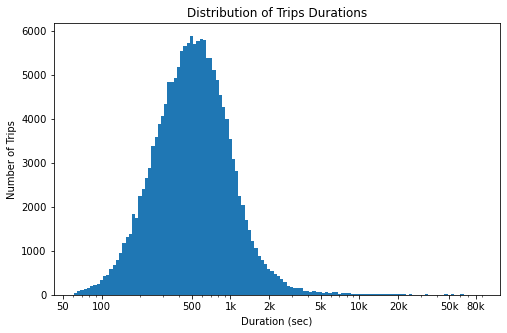

In [3]:
#Log-scale
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["duration_sec"], bins=bins);
plt.xscale('log')
plt.xticks([50,100,500, 1e3,2e3, 5e3, 1e4,2e4, 5e4, 8e4], [50,100,500, '1k','2k', '5k', '10k','20k', '50k', '80k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.title("Distribution of Trips Durations")
plt.show()


## Distribution of Trip Distances in (km)

> After removing the outliers (distances greater than 10 km), we can find that most of the trip distances ranges from 1 to 2 km.

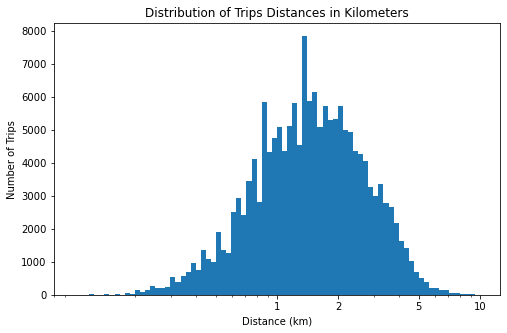

In [4]:
#Log-scale
log_binsize = 0.025
bins = 10 ** np.arange(-1, np.log10(df['distance_km'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["distance_km"],bins=bins);
plt.xscale('log')
plt.xticks([1, 2,5, 10], [1,2,5, 10])
plt.xlabel('Distance (km)')
plt.ylabel('Number of Trips')
plt.title("Distribution of Trips Distances in Kilometers")
plt.show()

## Trip number for each day for both male and female members

> The number of male members is always higher than female members. Also the weekends (Staurday & Sunday) have the lowest number of trips.



In [10]:
# List of days in order
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# create ordered categorical variable
df['start_day'] = pd.Categorical(df['start_day'], categories= day_order, ordered = True)

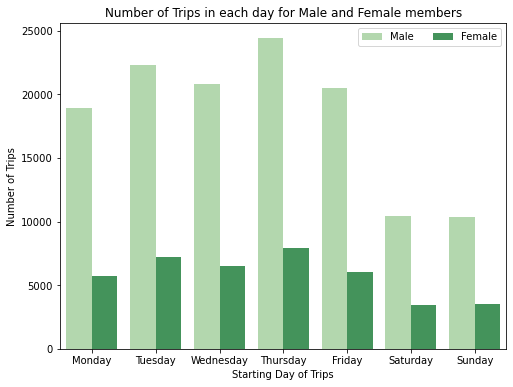

In [11]:
fig,ax=plt.subplots(figsize=[8,6])
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', palette = 'Greens', ax=ax)
ax.legend(loc=1,ncol = 3)
plt.xlabel("Starting Day of Trips");
plt.ylabel('Number of Trips');
plt.title("Number of Trips in each day for Male and Female members");

## Relation between distance of trip and duration for different members' gender and if the member partacipated in all trips

> As the distance increases the duration of the trip increases. But we still have long durations at short distances.

> The members who participate in all trips have lower durations for shorter distances that others. but we also concluded that, the gender does not have a significant effect.

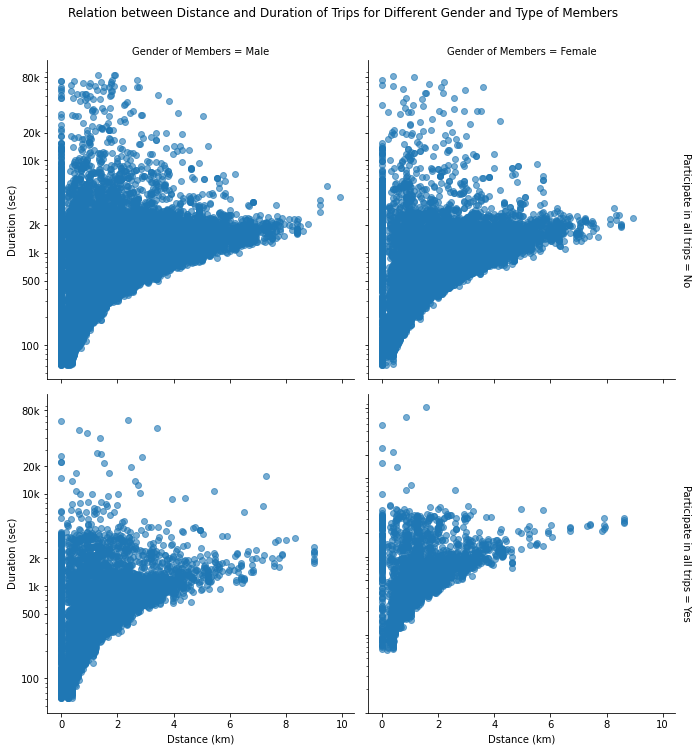

In [9]:
g=sb.FacetGrid(data=df, col="member_gender", row="bike_share_for_all_trip", height=5, margin_titles = True)
g.map(plt.scatter, "distance_km", "duration_sec",alpha=0.6);

g.set_ylabels('Duration (sec)')
g.set_xlabels('Dstance (km)')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template="Gender of Members = {col_name}" ,row_template="Participate in all trips = {row_name}")
plt.suptitle("Relation between Distance and Duration of Trips for Different Gender and Type of Members", y = 1.04)
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k']);